In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

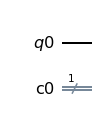

In [2]:
qc.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

In [4]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [5]:
from qiskit.visualization import plot_state_qsphere

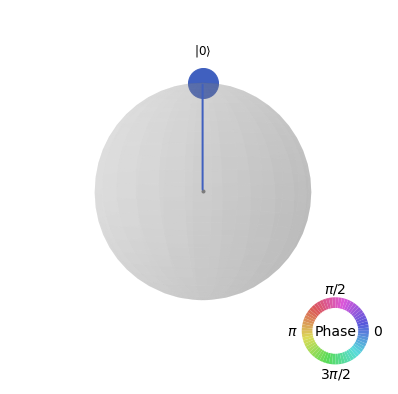

In [6]:
plot_state_qsphere(qc)

In [7]:
from qiskit.quantum_info import DensityMatrix

In [8]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

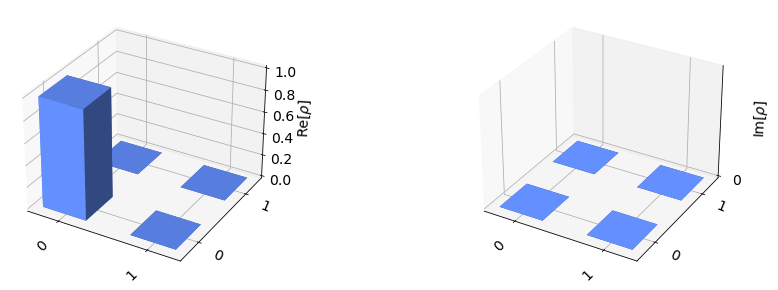

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

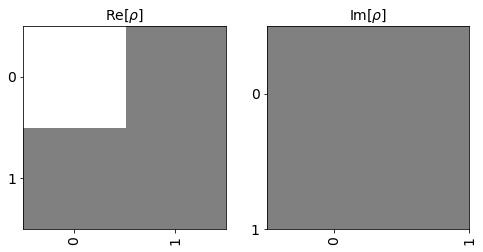

In [10]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

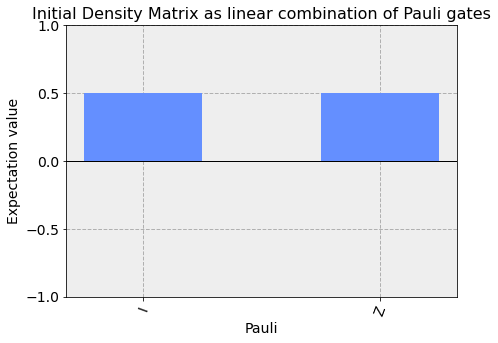

In [11]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

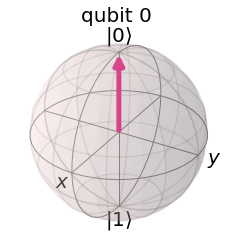

In [12]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [13]:
purity = rho1.purity()
print(purity)

(1+0j)


In [14]:
from math import pi

In [15]:
qc.rz(pi,q[0])

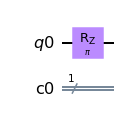

In [16]:
qc.draw('mpl')

In [17]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

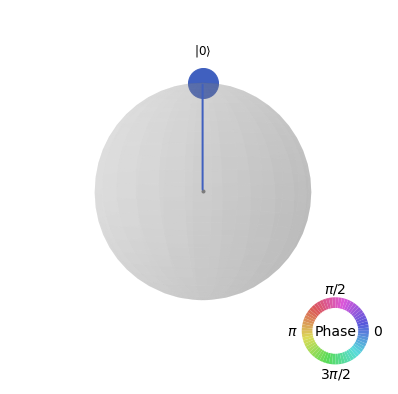

In [18]:
plot_state_qsphere(qc)

In [19]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

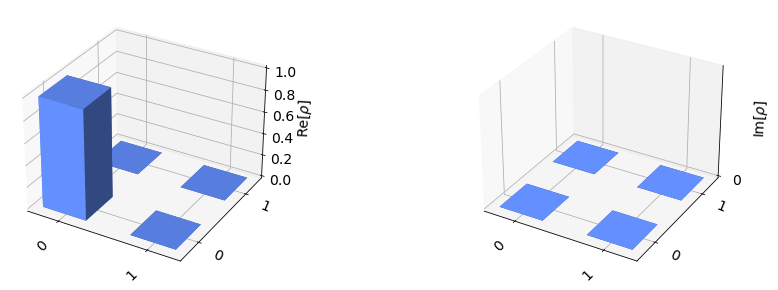

In [20]:
plot_state_city(qc)

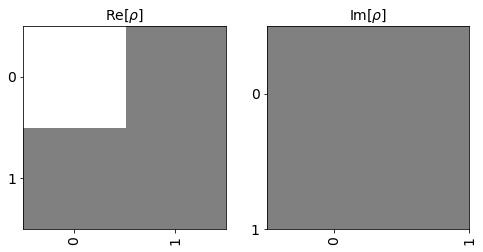

In [21]:
plot_state_hinton(qc)

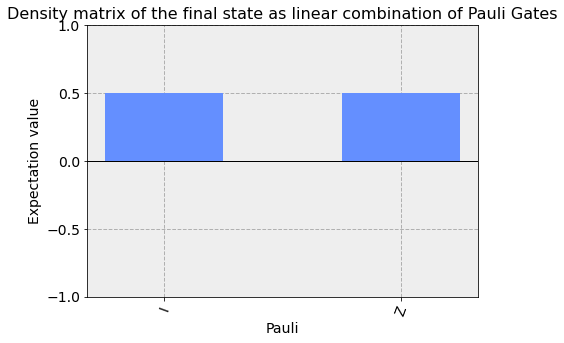

In [22]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

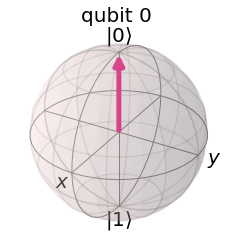

In [23]:
plot_bloch_multivector(qc)

In [24]:
purityf = rho2.purity()
print(purityf)

(1+0j)


In [25]:
from qiskit.quantum_info import state_fidelity

In [26]:
fidelity = state_fidelity(psi1,psi2)
print(fidelity)

1.0


In [27]:
fidelity = state_fidelity(rho1,rho2)
print(fidelity)

1.0


In [28]:
qc.measure(q[0],c[0])

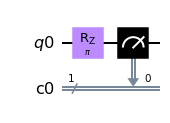

In [29]:
qc.draw('mpl')

In [30]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 1024}


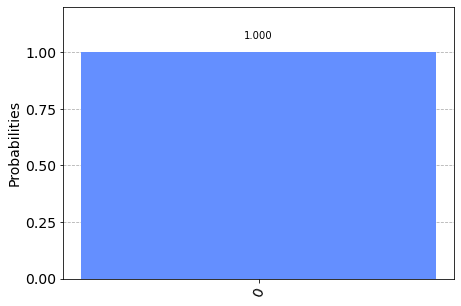

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)